# Multiple Layer GRU

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.3.0


# 1 Data

## Get the Data

In [2]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGJC8T5/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGJC8T5/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteGJC8T5/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


## Preprocess

In [3]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

# 2 Model

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(130, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 130)         41730     
_________________________________________________________________
global_average_pooling1d (Gl (None, 130)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8384      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 574,019
Trainable params: 574,019
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 30s 76ms/step - loss: 0.4621 - accuracy: 0.7731 - val_loss: 0.3076 - val_accuracy: 0.8778
Epoch 2/10
391/391 [==============================] - 18s 45ms/step - loss: 0.2287 - accuracy: 0.9136 - val_loss: 0.2947 - val_accuracy: 0.8810
Epoch 3/10
391/391 [==============================] - 16s 41ms/step - loss: 0.1707 - accuracy: 0.9390 - val_loss: 0.3255 - val_accuracy: 0.8730
Epoch 4/10
391/391 [==============================] - 15s 39ms/step - loss: 0.1391 - accuracy: 0.9509 - val_loss: 0.3549 - val_accuracy: 0.8697
Epoch 5/10
391/391 [==============================] - 15s 39ms/step - loss: 0.1138 - accuracy: 0.9595 - val_loss: 0.4033 - val_accuracy: 0.8603
Epoch 6/10
391/391 [==============================] - 15s 39ms/step - loss: 0.0893 - accuracy: 0.9704 - val_loss: 0.5114 - val_accuracy: 0.8602
Epoch 7/10
391/391 [==============================] - 15s 37ms/step - loss: 0.0711 - accuracy: 0.9770 - val_loss: 0.5589 - val_accuracy:

# 3 Plot Accuracy and Loss

In [10]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

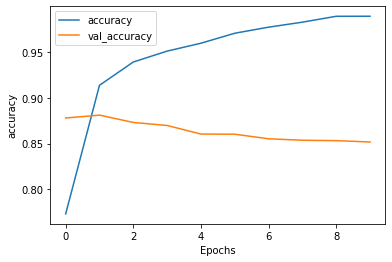

In [11]:
plot_graphs(history, 'accuracy')

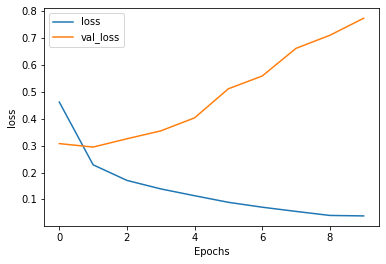

In [12]:
plot_graphs(history, 'loss')